In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
cleaned_coffee_df = pd.read_csv("reviews_feb_2023.csv")
cleaned_coffee_df

,title,rating,acidity_structure,aftertaste,aroma,body,flavor,with_milk,agtron,blind_assessment,bottom_line,coffee_origin,est_price,notes,review_date,roast_level,roaster,roaster_location,url
0,Bolivia Manantial Gesha,93,9.0,8.0,9,8,9,NaN,60/78,"Richly aromatic, floral-toned. Magnolia, cocoa nib, cane sugar, red plum, nutmeg in aroma and cup. Elegantly sweet structure with delicate, bright acidity; silky, vibrant mouthfeel. Flavor-saturated finish centered around notes of magnolia and cocoa nib, complicated by undertones of nutmeg.",This washed Boliva Gesha has all the aromatics you’d expect from the variety and is from an under-the-radar origin worth seeking out — a value for its type.,"Caranavi, Bolivia",$30.00/12 ounces,"Produced by Angel Mamani Chambi, entirely of the Geisha (also spelled Gesha) variety of Arabica, and processed by the traditional washed method (fruit skin and pulp are removed before drying). Established in 2010, Red Rooster is an organic-certified micro-roaster focusing on socially conscious, high-quality coffee. Visit redroostercoffee.com or call 540-745-7338 for more information.",January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",https://www.coffeereview.com/review/bolivia-manantial-gesha/
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,8.0,9,8,9,NaN,60/78,"Crisply sweet-savory. White peach, hop flowers, cocoa powder, pineapple kefir, fir in aroma and cup. Sweetly savory structure with brisk acidity; crisp, velvety mouthfeel. The finish consolidates to notes of cocoa powder and fir.",A carbonic-macerated Yellow Pacamara grown in Nicaragua that’s equal parts sweet (stone fruit and cocoa) and savory (hops and aromatic wood).,"Matagalpa growing region, Nicaragua",$160.00/12 ounces,"Produced by Benjamin Weiner at Finca Idealista entirely of the Yellow Pacamara variety of Arabica, and processed by the carbonic maceration method, which involves fermenting whole coffee fruit inside a sealed container that has been flushed with CO2, then drying the coffee, still in the whole fruit. Established in Cleveland, Ohio in 2014, Eccentricity Coffee Co. roasts small-batch coffees that highlight each coffee’s full potential. Visit www.eccentricitycoffee.com.",December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",https://www.coffeereview.com/review/brix-breaker-yellow-pacamara-carbonic-maceration-nanolot/
2,Ethiopia Gera Genji Challa,94,9.0,8.0,9,9,9,NaN,59/77,"Delicately aromatic, complex. Lilac, cocoa nib, pink grapefruit zest, shishito pepper, apricot in aroma and cup. Sweetly tart with juicy, bright acidity; plush, syrupy-smooth mouthfeel. Floral finish with cocoa undertones.","A nuanced, multilayered washed Ethiopia cup with spicy floral notes at its center and a throughline of cocoa nib.","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,"Ethiopia coffees like this one are largely produced largely from traditional indigenous landrace varieties of Arabica. Produced by smallholding members of the Nano Challa Cooperative and processed by the traditional washed method (fruit skin and pulp are removed before drying). Mostra Coffee is a women-, minority-, veteran-, and immigrant-owned micro-roaster based in north county San Diego. For more information, visit www.mostracoffee.com.",December 2022,Medium-Light,Mostra Coffee,"San Diego, California",https://www.coffeereview.com/review/ethiopia-gera-genji-challa/
3,Yirgacheffe Mengesha Natural,94,9.0,8.0,9,9,9,NaN,60/77,"High-toned, fruit-driven. Boysenberry, pear, cocoa nib, tangerine zest, pink peppercorn in aroma and cup. Sweetly tart structure with juicy-bright acidity; crisp, velvety mouthfeel. The finish consolidates to notes of boysenberry and tangerine zest with undertones of pink peppercorn.",A fruit medley in a cup — think boysenberry and fresh pear — with a crisp cocoa throughline.,"Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,"Produced at Mengesha Farm from selections of indigenous landrace va

In [3]:
# checking the values in the df
cleaned_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7041 non-null   object 
 1   rating             7041 non-null   object 
 2   acidity_structure  2166 non-null   float64
 3   aftertaste         6169 non-null   float64
 4   aroma              6991 non-null   object 
 5   body               7030 non-null   object 
 6   flavor             7025 non-null   object 
 7   with_milk          997 non-null    object 
 8   agtron             7041 non-null   object 
 9   blind_assessment   7040 non-null   object 
 10  bottom_line        2961 non-null   object 
 11  coffee_origin      6536 non-null   object 
 12  est_price          5002 non-null   object 
 13  notes              7033 non-null   object 
 14  review_date        7041 non-null   object 
 15  roast_level        6667 non-null   object 
 16  roaster            7041 

In [4]:
# dropping irrelevant columns and those that contain a lot of NaN's
cleaned_coffee_df.drop(["acidity_structure", "with_milk", "bottom_line", "review_date"], axis=1, inplace=True)

# renaming columns
cleaned_coffee_df.rename(columns={"title": "coffee_name"}, inplace=True)

In [5]:
# switching the order of the columns
cleaned_coffee_df = cleaned_coffee_df[['coffee_name', 'rating', 'est_price', 'aftertaste', 'aroma',
       'body', 'flavor', 'agtron', 'blind_assessment', 'coffee_origin', 'notes', 'roast_level', 'roaster', 'roaster_location',
       'url']]

In [6]:
cleaned_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_name       7041 non-null   object 
 1   rating            7041 non-null   object 
 2   est_price         5002 non-null   object 
 3   aftertaste        6169 non-null   float64
 4   aroma             6991 non-null   object 
 5   body              7030 non-null   object 
 6   flavor            7025 non-null   object 
 7   agtron            7041 non-null   object 
 8   blind_assessment  7040 non-null   object 
 9   coffee_origin     6536 non-null   object 
 10  notes             7033 non-null   object 
 11  roast_level       6667 non-null   object 
 12  roaster           7041 non-null   object 
 13  roaster_location  7038 non-null   object 
 14  url               7041 non-null   object 
dtypes: float64(1), object(14)
memory usage: 825.2+ KB


In [7]:
# replacing NaN's with "Undetermined" where relevant
cleaned_coffee_df[["coffee_origin", "roast_level", "roaster_location"]] = cleaned_coffee_df[["coffee_origin", "roast_level", "roaster_location"]].fillna("Undetermined")

In [8]:
cleaned_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_name       7041 non-null   object 
 1   rating            7041 non-null   object 
 2   est_price         5002 non-null   object 
 3   aftertaste        6169 non-null   float64
 4   aroma             6991 non-null   object 
 5   body              7030 non-null   object 
 6   flavor            7025 non-null   object 
 7   agtron            7041 non-null   object 
 8   blind_assessment  7040 non-null   object 
 9   coffee_origin     7041 non-null   object 
 10  notes             7033 non-null   object 
 11  roast_level       7041 non-null   object 
 12  roaster           7041 non-null   object 
 13  roaster_location  7041 non-null   object 
 14  url               7041 non-null   object 
dtypes: float64(1), object(14)
memory usage: 825.2+ KB


In [9]:
# dropping all the rows that still contain NaN's
cleaned_coffee_df = cleaned_coffee_df.dropna()

In [10]:
cleaned_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4949 entries, 0 to 5258
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_name       4949 non-null   object 
 1   rating            4949 non-null   object 
 2   est_price         4949 non-null   object 
 3   aftertaste        4949 non-null   float64
 4   aroma             4949 non-null   object 
 5   body              4949 non-null   object 
 6   flavor            4949 non-null   object 
 7   agtron            4949 non-null   object 
 8   blind_assessment  4949 non-null   object 
 9   coffee_origin     4949 non-null   object 
 10  notes             4949 non-null   object 
 11  roast_level       4949 non-null   object 
 12  roaster           4949 non-null   object 
 13  roaster_location  4949 non-null   object 
 14  url               4949 non-null   object 
dtypes: float64(1), object(14)
memory usage: 618.6+ KB


In [11]:
# turning some columns into integers
cleaned_coffee_df[["rating", "aftertaste", "aroma", "body", "flavor"]] = cleaned_coffee_df[["rating", "aftertaste", "aroma", "body", "flavor"]].astype(int)

In [12]:
cleaned_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4949 entries, 0 to 5258
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_name       4949 non-null   object
 1   rating            4949 non-null   int32 
 2   est_price         4949 non-null   object
 3   aftertaste        4949 non-null   int32 
 4   aroma             4949 non-null   int32 
 5   body              4949 non-null   int32 
 6   flavor            4949 non-null   int32 
 7   agtron            4949 non-null   object
 8   blind_assessment  4949 non-null   object
 9   coffee_origin     4949 non-null   object
 10  notes             4949 non-null   object
 11  roast_level       4949 non-null   object
 12  roaster           4949 non-null   object
 13  roaster_location  4949 non-null   object
 14  url               4949 non-null   object
dtypes: int32(5), object(10)
memory usage: 522.0+ KB


In [13]:
# cleaning the "review" column
cleaned_coffee_df['blind_assessment'] = cleaned_coffee_df['blind_assessment'].str.replace('\n', '')
cleaned_coffee_df['blind_assessment'] = cleaned_coffee_df['blind_assessment'].str.replace('\r', '')

In [14]:
# adding columns that give a more tangible description of the different ratings,
# based on the description on how to interpretate reviews: https://www.coffeereview.com/interpret-coffee/

# rating & interpretation
# 95-100: Exceptional
# 90-94: Very Good to Outstanding
# 85-89: Good
# 80-84: Fair
# <80: Poor

cleaned_coffee_df["rating_cat"] = cleaned_coffee_df["rating"].apply(lambda x: "Exceptional" if x >= 95
                                                     else ("Very Good to Outstanding" if x >= 90
                                                           else ("Good" if x >= 85
                                                                 else ("Fair" if x >= 80
                                                                       else "Poor" if x < 80 else None))))

In [15]:
# switching the order of the columns again
cleaned_coffee_df = cleaned_coffee_df[['coffee_name', 'rating', 'rating_cat', 'est_price', 'aftertaste', 'aroma',
       'body', 'flavor', 'agtron', 'blind_assessment', 'coffee_origin', 'notes', 'roast_level', 'roaster', 'roaster_location',
       'url']]

In [16]:
# resetting the index
cleaned_coffee_df = cleaned_coffee_df.reset_index(drop=True)

In [17]:
cleaned_coffee_df

,coffee_name,rating,rating_cat,est_price,aftertaste,aroma,body,flavor,agtron,blind_assessment,coffee_origin,notes,roast_level,roaster,roaster_location,url
0,Bolivia Manantial Gesha,93,Very Good to Outstanding,$30.00/12 ounces,8,9,8,9,60/78,"Richly aromatic, floral-toned. Magnolia, cocoa nib, cane sugar, red plum, nutmeg in aroma and cup. Elegantly sweet structure with delicate, bright acidity; silky, vibrant mouthfeel. Flavor-saturated finish centered around notes of magnolia and cocoa nib, complicated by undertones of nutmeg.","Caranavi, Bolivia","Produced by Angel Mamani Chambi, entirely of the Geisha (also spelled Gesha) variety of Arabica, and processed by the traditional washed method (fruit skin and pulp are removed before drying). Established in 2010, Red Rooster is an organic-certified micro-roaster focusing on socially conscious, high-quality coffee. Visit redroostercoffee.com or call 540-745-7338 for more information.",Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",https://www.coffeereview.com/review/bolivia-manantial-gesha/
1,Yellow Pacamara Carbonic Maceration Nanolot,92,Very Good to Outstanding,$160.00/12 ounces,8,9,8,9,60/78,"Crisply sweet-savory. White peach, hop flowers, cocoa powder, pineapple kefir, fir in aroma and cup. Sweetly savory structure with brisk acidity; crisp, velvety mouthfeel. The finish consolidates to notes of cocoa powder and fir.","Matagalpa growing region, Nicaragua","Produced by Benjamin Weiner at Finca Idealista entirely of the Yellow Pacamara variety of Arabica, and processed by the carbonic maceration method, which involves fermenting whole coffee fruit inside a sealed container that has been flushed with CO2, then drying the coffee, still in the whole fruit. Established in Cleveland, Ohio in 2014, Eccentricity Coffee Co. roasts small-batch coffees that highlight each coffee’s full potential. Visit www.eccentricitycoffee.com.",Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",https://www.coffeereview.com/review/brix-breaker-yellow-pacamara-carbonic-maceration-nanolot/
2,Ethiopia Gera Genji Challa,94,Very Good to Outstanding,$28.00/12 ounces,8,9,9,9,59/77,"Delicately aromatic, complex. Lilac, cocoa nib, pink grapefruit zest, shishito pepper, apricot in aroma and cup. Sweetly tart with juicy, bright acidity; plush, syrupy-smooth mouthfeel. Floral finish with cocoa undertones.","Agaro Gera, Jimma Zone, Oromia State, Ethiopia","Ethiopia coffees like this one are largely produced largely from traditional indigenous landrace varieties of Arabica. Produced by smallholding members of the Nano Challa Cooperative and processed by the traditional washed method (fruit skin and pulp are removed before drying). Mostra Coffee is a women-, minority-, veteran-, and immigrant-owned micro-roaster based in north county San Diego. For more information, visit www.mostracoffee.com.",Medium-Light,Mostra Coffee,"San Diego, California",https://www.coffeereview.com/review/ethiopia-gera-genji-challa/
3,Yirgacheffe Mengesha Natural,94,Very Good to Outstanding,$20.50/12 ounces,8,9,9,9,60/77,"High-toned, fruit-driven. Boysenberry, pear, cocoa nib, tangerine zest, pink peppercorn in aroma and cup. Sweetly tart structure with juicy-bright acidity; crisp, velvety mouthfeel. The finish consolidates to notes of boysenberry and tangerine zest with undertones of pink peppercorn.","Yirgacheffe growing region, southern Ethiopia","Produced at Mengesha Farm from selections of indigenous landrace varieties of Arabica long grown in the region, and processed by the natural method (dried in the whole fruit). With more than 10 years of roasting experience, Regent strives to deliver coffee with care and purpose. Visit regentcoffee.com for more information.",Medium-Light,Regent Coffee,"Glendale, California",https://www.coffeereview.com/review/yirgacheffe-mengesha-natural/
4,Tropical Summer Colombia La Sierra,93,Very Good to Outstanding,$18.99/8 ounces,8,9,8,9,60/77,"Fruit-driven, crisply chocolaty. Goji berry, dried pl

In [ ]:
# replacing the "est_price" column with prices in Euros/100gr

In [ ]:
# importing the dataframe with the recalculated prices
price_clean = pd.read_csv("Price_weight_cleaned.csv")

In [ ]:
# perhaps drop some of the irrelevant columns to ensure that there is no error?

In [ ]:
# merging the two dataframes based on the index
cleaned_coffee_df = pd.merge(cleaned_coffee_df, price_clean, left_index=True, right_index=True)

In [ ]:
cleaned_coffee_df.columns

In [ ]:
# creating a new "cleaned_coffee_df" that contains all the final columns
cleaned_coffee_df = cleaned_coffee_df[['coffee_name', 'rating', 'Euro', 'aftertaste', 'aroma',
       'body', 'flavor', 'agtron', 'blind_assessment', 'coffee_origin', 'notes', 'roast_level', 'roaster', 'roaster_location',
       'url']]

In [ ]:
# renaming the 'Euro' column
cleaned_coffee_df = cleaned_coffee_df.rename(columns={'Euro': 'est_price_euro/100gr'})

In [1]:
# export the "cleaned_coffee_df" to a csv file
cleaned_coffee_df.to_csv("cleaned_coffee_df.csv", index=False)

NameError: name 'cleaned_coffee_df' is not defined

Concatenating the new cleaned price database

In [ ]:
Price_updt = pd.read_csv('/Users/david/Documents/GitHub/Final_project_DGU_LDU_COFFEE/2_data_cleaning&analysis/1_cleaning/Price_weight_cleaned.csv')
Feb = pd.read_csv("/Users/david/Documents/GitHub/Final_project_DGU_LDU_COFFEE/3_coffee_compass_programme/clustered_coffee_df_WORKING.csv")

In [2]:
Final_db = pd.merge(Feb, Price_updt[['blind_assessment', '100_gr_EUR']], on='blind_assessment', how='left')

NameError: name 'pd' is not defined

In [3]:
Final_db['100_gr_EUR'].fillna('not available', inplace=True)
# display the updated dataframe
Final_db['100_gr_EUR']

NameError: name 'Final_db' is not defined

In [4]:
Final_db.to_csv('Final_db.csv')

NameError: name 'Final_db' is not defined

WORDCLOUD

In [1]:
# Importing the Libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
words_df = pd.read_csv('/Users/david/Documents/GitHub/Final_project_DGU_LDU_COFFEE/2_data_cleaning&analysis/3_NLP/wordcloud.csv')

In [3]:
words_df['0']

0      chocolate
1        acidity
2         syrupy
3           tart
4          cocoa
         ...    
228       slight
229    persimmon
230       lemony
231       flower
232        anise
Name: 0, Length: 233, dtype: object

In [4]:
words_df['1']

0      4016
1      3837
2      1943
3      1921
4      1758
       ... 
228      64
229      64
230      64
231      64
232      64
Name: 1, Length: 233, dtype: int64

In [5]:
word_dict = pd.Series(words_df['1'].values,index=words_df['0']).to_dict()

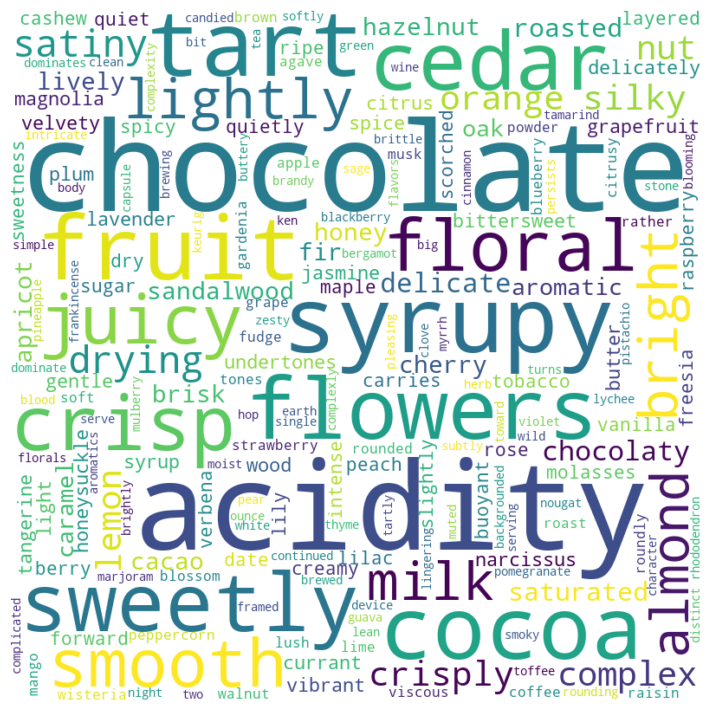

In [7]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_dict)

plt.figure(figsize=(9,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

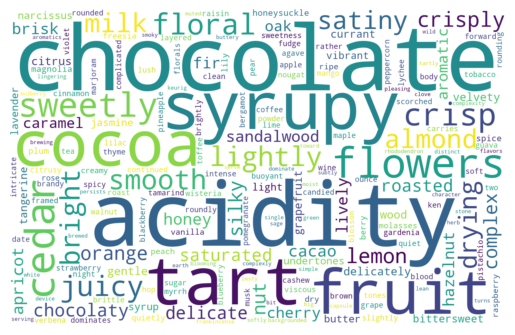

In [6]:
import numpy as np
from PIL import Image

# Load the coffee cup image as a numpy array
coffee_mask = np.array(Image.open("coffee.jpg"))

# Create a WordCloud object with the coffee cup mask
wordcloud = WordCloud(background_color='white', mask=coffee_mask).generate_from_frequencies(word_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()